In [1]:
import pickle
import networkx as nx
import numpy as np

with open(r'graphs/H64f1.pkl', 'rb') as f:
    test_graph = pickle.load(f)

# nx.draw(test_graph, with_labels=True)

for u, v in test_graph.edges():
    if 'weight' not in test_graph[u][v]:
        test_graph[u][v]['weight'] = 1

        import matplotlib.pyplot as plt
import numpy as np

def draw_partitioned_graph(graph, num_partitions, assignment, title="Graph Partitioning"):
    """
    Draw a graph with nodes positioned in pizza slice regions based on their partition
    """
    if len(graph.nodes()) > 64:
        print(f"Graph too large to visualize effectively ({len(graph.nodes())} nodes). Skipping visualization.")
        return
        
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    colors = plt.cm.Set3(np.linspace(0, 1, num_partitions))
    
    # Calculate positions for nodes in pizza slices
    pos = {}
    partition_counts = {}
    partition_positions = {}
    
    # Count nodes in each partition and initialize position counters
    for node_idx, node in enumerate(graph.nodes()):
        partition = assignment[node] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[node_idx]
        if partition not in partition_counts:
            partition_counts[partition] = 0
            partition_positions[partition] = 0
        partition_counts[partition] += 1
    
    # Position nodes in pizza slices
    for node_idx, node in enumerate(graph.nodes()):
        partition = assignment[node] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[node_idx]
        
        # Calculate angle for this partition (pizza slice)
        slice_angle_start = (partition / num_partitions) * 2 * np.pi
        slice_angle_end = ((partition + 1) / num_partitions) * 2 * np.pi
        slice_angle_width = slice_angle_end - slice_angle_start
        
        # Position within the slice
        nodes_in_partition = partition_counts[partition]
        node_index_in_partition = partition_positions[partition]
        partition_positions[partition] += 1
        
        # Distribute nodes within the slice
        if nodes_in_partition == 1:
            angle_offset = slice_angle_width / 2
        else:
            angle_offset = (node_index_in_partition / (nodes_in_partition - 1)) * slice_angle_width * 0.8
            angle_offset += slice_angle_width * 0.1  # Add some margin
        
        angle = slice_angle_start + angle_offset
        
        # Vary the radius slightly to avoid overlapping
        radius = 0.7 + 0.2 * (node_index_in_partition % 3) / 3
        
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        pos[node] = (x, y)
    
    # Draw partition boundaries (pizza slice lines)
    for partition in range(num_partitions):
        angle = (partition / num_partitions) * 2 * np.pi
        x_line = [0, np.cos(angle)]
        y_line = [0, np.sin(angle)]
        ax.plot(x_line, y_line, 'k--', alpha=0.3, linewidth=1)
    
    # Draw edges
    edge_colors = []
    for u, v in graph.edges():
        u_partition = assignment[u] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[list(graph.nodes()).index(u)]
        v_partition = assignment[v] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[list(graph.nodes()).index(v)]
        
        if u_partition == v_partition:
            edge_colors.append('gray')  # Internal edges
        else:
            edge_colors.append('red')   # Cut edges
    
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, alpha=0.6, ax=ax)
    
    # Draw nodes colored by partition
    for partition in range(num_partitions):
        nodes_in_partition = []
        for node_idx, node in enumerate(graph.nodes()):
            node_partition = assignment[node] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[node_idx]
            if node_partition == partition:
                nodes_in_partition.append(node)
        
        if nodes_in_partition:
            nx.draw_networkx_nodes(graph, pos, nodelist=nodes_in_partition, 
                                 node_color=[colors[partition]], 
                                 node_size=500, alpha=0.8, ax=ax)
    
    # Draw node labels
    nx.draw_networkx_labels(graph, pos, font_size=8, font_weight='bold', ax=ax)
    
    # Draw edge weights if they exist
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    if edge_labels:
        nx.draw_networkx_edge_labels(graph, pos, edge_labels, font_size=6, ax=ax)
    
    # Add partition labels
    for partition in range(num_partitions):
        angle = (partition / num_partitions) * 2 * np.pi + (np.pi / num_partitions)
        label_x = 1.1 * np.cos(angle)
        label_y = 1.1 * np.sin(angle)
        ax.text(label_x, label_y, f'P{partition}', 
                fontsize=10, fontweight='bold', 
                ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=colors[partition], alpha=0.7))
    
    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('off')
    
    # Add legend
    cut_edges = sum(1 for u, v in graph.edges() 
                   if (assignment[u] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[list(graph.nodes()).index(u)]) != 
                      (assignment[v] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[list(graph.nodes()).index(v)]))
    total_edges = len(graph.edges())
    
    # Calculate cut size properly
    try:
        cut_size = calculate_cut_size(graph, assignment)
        ax.text(0, -1.4, f'Cut edges: {cut_edges}/{total_edges} (Cut size: {cut_size})', 
                ha='center', fontsize=10, fontweight='bold')
    except:
        ax.text(0, -1.4, f'Cut edges: {cut_edges}/{total_edges}', 
                ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("Graph visualization function ready!")

Graph visualization function ready!


In [2]:
# Create a test graph and network
def create_test_example(n_nodes=12, edge_probability=0.3, num_partitions=2, max_weight=4, seed=42):
    """Create a test case using Erdős-Rényi random graph"""

    G = nx.erdos_renyi_graph(n_nodes, edge_probability, seed=seed)
    while not nx.is_connected(G):
        seed += 1
        G = nx.erdos_renyi_graph(n_nodes, edge_probability, seed=seed)

    
    # Add random weights to edges
    np.random.seed(seed)
    for u, v in G.edges():
        weight = np.random.randint(1, max_weight)  # Random weights between 1 and 4
        G[u][v]['weight'] = weight
    # Create quantum network with 3 partitions

    return G, qpu_sizes

# Create test case
n_nodes = test_graph.number_of_nodes()  # Adjusted for larger graph

print("N nodes:", n_nodes)
# n_nodes = 64

# test_graph, qpu_sizes = create_test_example(n_nodes=n_nodes, edge_probability=0.1, num_partitions=16, max_weight=4, seed=42)


qpu_size = (16,)

def find_max_size(graph):
    """Find the maximum partition size based on the graph size"""
    # For simplicity, we set max_size to the number of nodes in the graph
    return len(graph.nodes) + 2*len(graph.edges)

max_size = find_max_size(test_graph)

print(max_size)

num_partitions = max_size // (qpu_size[0] - 1)

print(num_partitions)

qpu_sizes = { i : qpu_size[0] for i in range(num_partitions) }

print("QPU sizes:", qpu_sizes)


N nodes: 64
256
17
QPU sizes: {0: 16, 1: 16, 2: 16, 3: 16, 4: 16, 5: 16, 6: 16, 7: 16, 8: 16, 9: 16, 10: 16, 11: 16, 12: 16, 13: 16, 14: 16, 15: 16, 16: 16}


In [3]:
print(16*16)

256


In [4]:
import numpy as np

from disqco.parti.FM.FM_methods_nx import set_initial_partition_assignment
from disqco.parti.FM.FM_main_nx import fm_algorithm





In [5]:
# Test regular FM
import time


fm_assignment, fm_cut, fm_cuts_history = fm_algorithm(test_graph, qpu_sizes, max_iterations=10, move_limit=len(test_graph.nodes()),ancilla=True)
print("\n" + "=" * 60)
print("REGULAR FM RESULTS")
print("=" * 60)
print(f"FM cut size: {fm_cut}")
print(f"Partition sizes: {np.bincount(fm_assignment)}")

# target_partitions = len(qpu_sizes)
# start = time.time()

# recursive_assignment, recursive_cut, recursive_subgraphs = recursive_fm_algorithm(
#     test_graph, target_partitions, max_iterations=5, move_limit=len(test_graph.nodes()))

# end = time.time()

# print(f"Recursive FM Algorithm completed in {end - start:.2f} seconds.")
# print("FINAL RESULTS:")
# print(f"Final cut size: {recursive_cut}")



W matrix:
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Initial cut size: 92
Max gain (max weighted degree): 3

Iteration 1
Spaces available: {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0, 13: 4, 14: 4, 15: 5, 16: 4}
Updating ancilla spaces for move from 8 to 13 with neighbour in 13
Updating ancilla spaces for move from 8 to 13 with neighbour in 12
Updating ancilla spaces for move from 8 to 13 with neighbour in 13
Update spaces after moving node 25 from partition 8 to 13: {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 2, 9: 1, 10: 0, 11: 0, 12: 0, 13: 4, 14: 4, 15: 5, 16: 4}
Updating ancilla spaces for move from 12 to 13 with neighbour in 10
Updating ancilla spaces for move from 12 to 13 with neighbour in 4
Update spaces after moving node 46 from partition 12 to 13: {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 2, 9: 1, 10: 0, 11: 0

VISUALIZATIONS
Initial partition visualization:
Capacities after initial assignment with ancillae: {np.int64(0): 15, np.int64(1): 15, np.int64(2): 16, np.int64(3): 16, np.int64(4): 16, np.int64(5): 16, np.int64(6): 16, np.int64(7): 16, np.int64(8): 16, np.int64(9): 15, np.int64(10): 16, np.int64(11): 16, np.int64(12): 16, np.int64(13): 12, np.int64(14): 12, np.int64(15): 11, np.int64(16): 12}


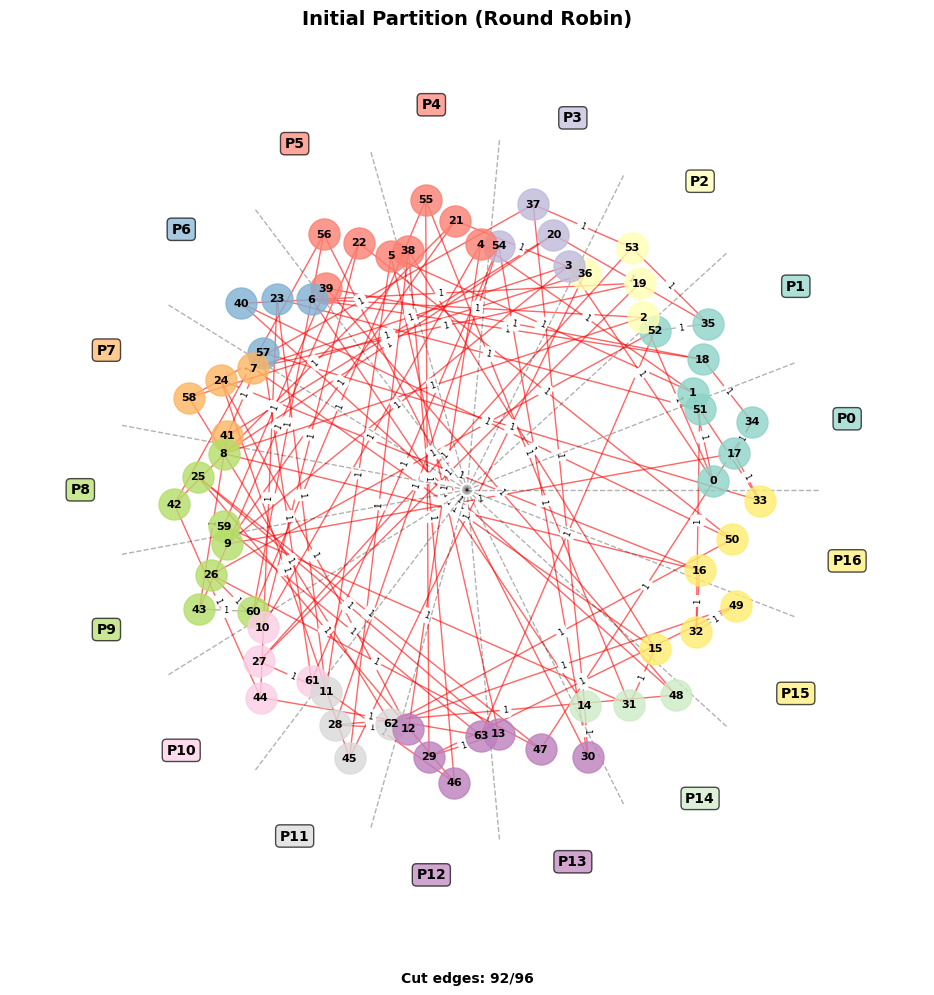


Recursive FM result:


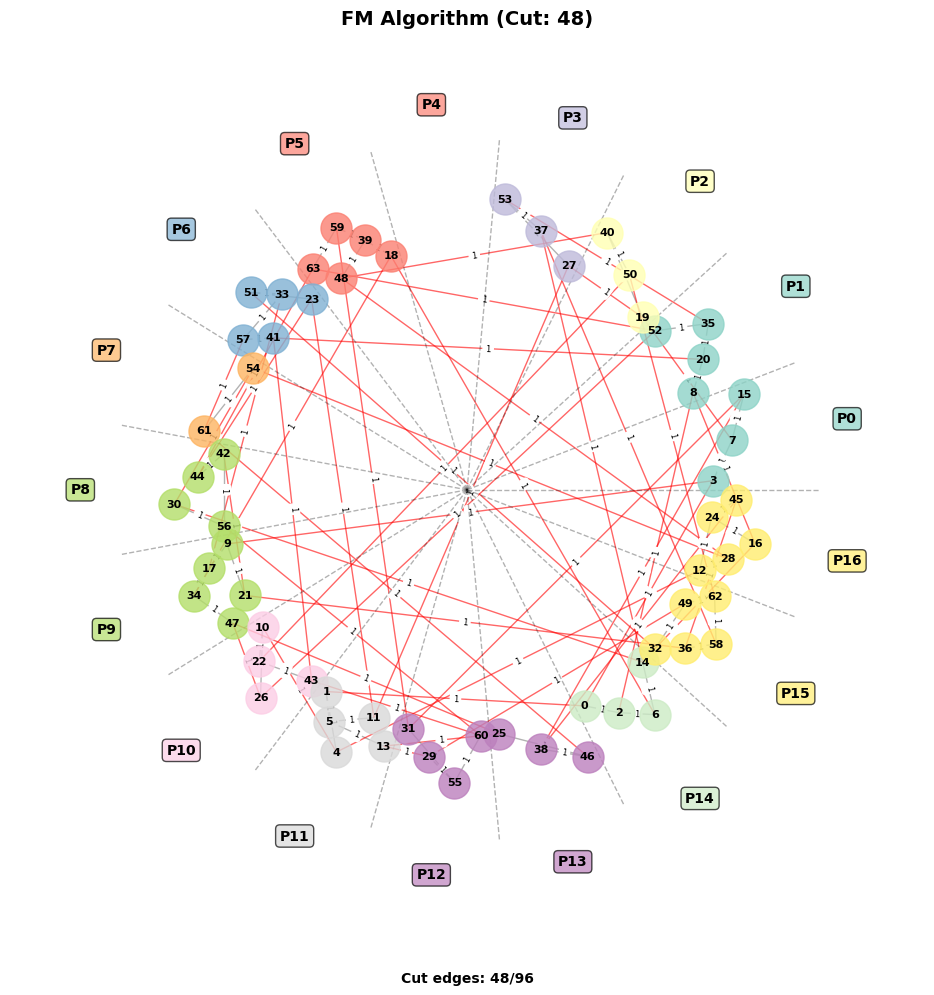

Capacities after FM with ancillae: {np.int64(14): 13, np.int64(11): 16, np.int64(0): 10, np.int64(1): 13, np.int64(9): 16, np.int64(10): 13, np.int64(16): 16, np.int64(5): 16, np.int64(2): 10, np.int64(6): 16, np.int64(13): 10, np.int64(3): 10, np.int64(12): 13, np.int64(8): 13, np.int64(15): 16, np.int64(7): 7}


In [6]:
def calculate_capacities(assignment, graph, ancilla=False):
    capacities = {}
    for part in assignment:
        if part not in capacities:
            capacities[part] = 0
        capacities[part] += 1
    if ancilla:
        for edge in graph.edges():
            u, v = edge
            if assignment[u] != assignment[v]:
                capacities[assignment[u]] += 1
                capacities[assignment[v]] += 1
            else:
                capacities[assignment[u]] += 1  # No increase for internal edges
    return capacities


# Visualize the results if graph is small enough
if len(test_graph.nodes()) <= 64:
    print("=" * 50)
    print("VISUALIZATIONS")
    print("=" * 50)
    
    # Visualize initial partition
    print("Initial partition visualization:")
    initial_assignment = set_initial_partition_assignment(test_graph, qpu_sizes, method='round_robin')

    capacities_initial = calculate_capacities(initial_assignment, test_graph, ancilla=True)

    print("Capacities after initial assignment with ancillae:", capacities_initial)
    
    draw_partitioned_graph(test_graph, num_partitions, initial_assignment, "Initial Partition (Round Robin)")

    # Visualize recursive FM result
    print("\nRecursive FM result:")

    draw_partitioned_graph(test_graph, num_partitions, fm_assignment, f"FM Algorithm (Cut: {fm_cut})")

    capacities_final = calculate_capacities(fm_assignment, test_graph, ancilla=True)

    print("Capacities after FM with ancillae:", capacities_final)


    



In [7]:
# Compare with nx spectral bisecction and Kernighan-Lin
import copy
from networkx.algorithms import community

def cut_nx_graph_max(
    G, qpu_max: int = 25, comms=None, return_comms=False, func="spectral",
    seed=None
):
    ### Inputs
    # - G nx.Graph to partition
    # - QPU_max - max number of vertex in subgraph set
    # - Comms - list of subgraphs as initial inputs (these can be further partions)
    # - return_comms - return the resulting subgraphs selected
    # - seed - random seed for spectral bisection
    # This function does not attempt to find an optimal cut
    # Just bisect the (sub)graphs until there are n segments
    # Spectral - use spectral bisection (eigenvalue partitioning)
    # Kernigham_lin  = min-weight random bisection
    #  spectral seems better but non-optimal
    G = copy.deepcopy(G)
    if func not in ["spectral", "kernighan_lin", "mitis"]:
        raise ValueError("invalid func flag")
    if comms is None:
        comms = [G]
    communities = sorted(
        comms, key=lambda x: len(x.nodes), reverse=True
    )

    if len(G.nodes) <= qpu_max or len(G.nodes) == 1:
        pass  # already done
    elif qpu_max < len(G.nodes) and len(G.nodes) >= 2:
        while len(communities[0].nodes) > 1 and not np.all(
            [len(k.nodes) <= qpu_max for k in communities]
        ):  # keep going while size of communites (|C|) --> n_qpu>=|C|>1
            k_prime = communities.pop(0)
            if func == "spectral":
                left, right = nx.spectral_bisection(k_prime, seed=seed)
            elif func == "kernighan_lin":
                left, right = community.kernighan_lin.kernighan_lin_bisection(
                    k_prime, max_iter=1_000_000
                )
            elif func == "mitis":
                raise NotImplementedError("not done yet sorry")

            communities.append(G.subgraph(left))
            communities.append(G.subgraph(right))
            communities = sorted(
                communities, key=lambda x: len(x.nodes), reverse=True
            )  # set with most nodes - bit of a heuristic choice imo

    else:
        raise ValueError(
            f"can not cut a {len(G.nodes)}-node graph into {qpu_max}-sized segments"
        )
    for device_i, comm in enumerate(communities):
        for node in comm:
            G.nodes[node]["QPU"] = device_i
            # Node is part of device i for devices in range 0..n
    return G, communities


In [8]:
start = time.time()
G, comms = cut_nx_graph_max(test_graph, qpu_max=max(list(qpu_sizes.values())), func="kernighan_lin", seed=42)
end = time.time()
print(f"Graph partitioning completed in {end - start:.2f} seconds.")

Graph partitioning completed in 0.00 seconds.


In [9]:
def calculate_cut_from_communities(graph, communities):
    cut = 0
    for comm in communities:
        for node in comm:
            for neighbor in graph.neighbors(node):
                if neighbor not in comm:
                    cut += 1
    return cut

def set_assignment_from_communities(graph, communities):
    assignment = [0] * len(graph.nodes())
    for i, comm in enumerate(communities):
        for node in comm:
            assignment[node] = i
    return assignment


assignment_KL = set_assignment_from_communities(test_graph, comms)

cut_KL = calculate_cut_size(test_graph, assignment_KL)
partition_counts = [len([n for n in assignment_KL if n == i]) for i in range(max(assignment_KL) + 1)]
print(f"\nPartition sizes from NetworkX KL: {partition_counts}")
print(f"\nCut size from NetworkX Kernighan-Lin: {cut_KL}")
draw_partitioned_graph(test_graph, max(assignment_KL)+1, assignment_KL, "Final Partition (After NetworkX Kernighan-Lin)")



NameError: name 'calculate_cut_size' is not defined

In [ ]:
from disqco.parti.fgp.fgp_roee import (
    run_initial_OEE
)
assignment = set_initial_partition_assignment(test_graph, list(qpu_sizes.values()), method='round_robin')
start_time = time.time()
refined_assignment, mapping = run_initial_OEE(test_graph, assignment, list(qpu_sizes.values()))

print('Cut from OEE:', calculate_cut_size(test_graph, refined_assignment))
print(f'Time taken: {time.time() - start_time:.2f} seconds')

partition_counts = [len([n for n in refined_assignment if n == i]) for i in range(num_partitions)]

print(f"\nPartition sizes from OEE: {partition_counts}")


Running OEE
Cut from OEE: 51
Time taken: 0.24 seconds

Partition sizes from OEE: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3]
Cut from OEE: 51
Time taken: 0.24 seconds

Partition sizes from OEE: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3]


[12 12 15  8 12 13  5  8 15  7  9 13 12 13  5 10 15  7 14  8  3  7  9  6
  0  0  1  8  3  4  5  2  4  6  0  1 11 11 10 14 16  3  7  9  2 11 10  0
 14  4 16  6  1  1  3  4  5  6 11  2  9 10 16  2]


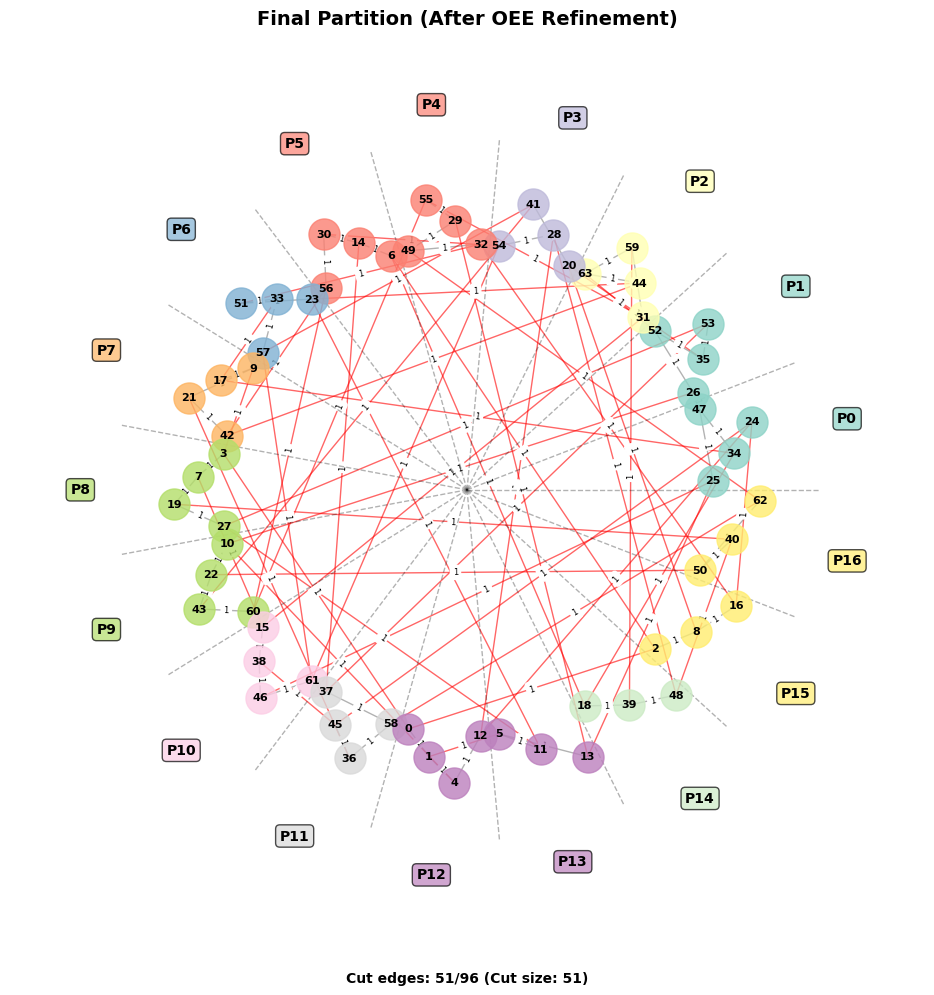

In [ ]:
print(refined_assignment)

draw_partitioned_graph(test_graph, num_partitions, refined_assignment, "Final Partition (After OEE Refinement)")

Graph partitioning completed in 0.14 seconds.

Partition sizes from NetworkX spectral bisection: [16, 16, 16, 16]
4 4


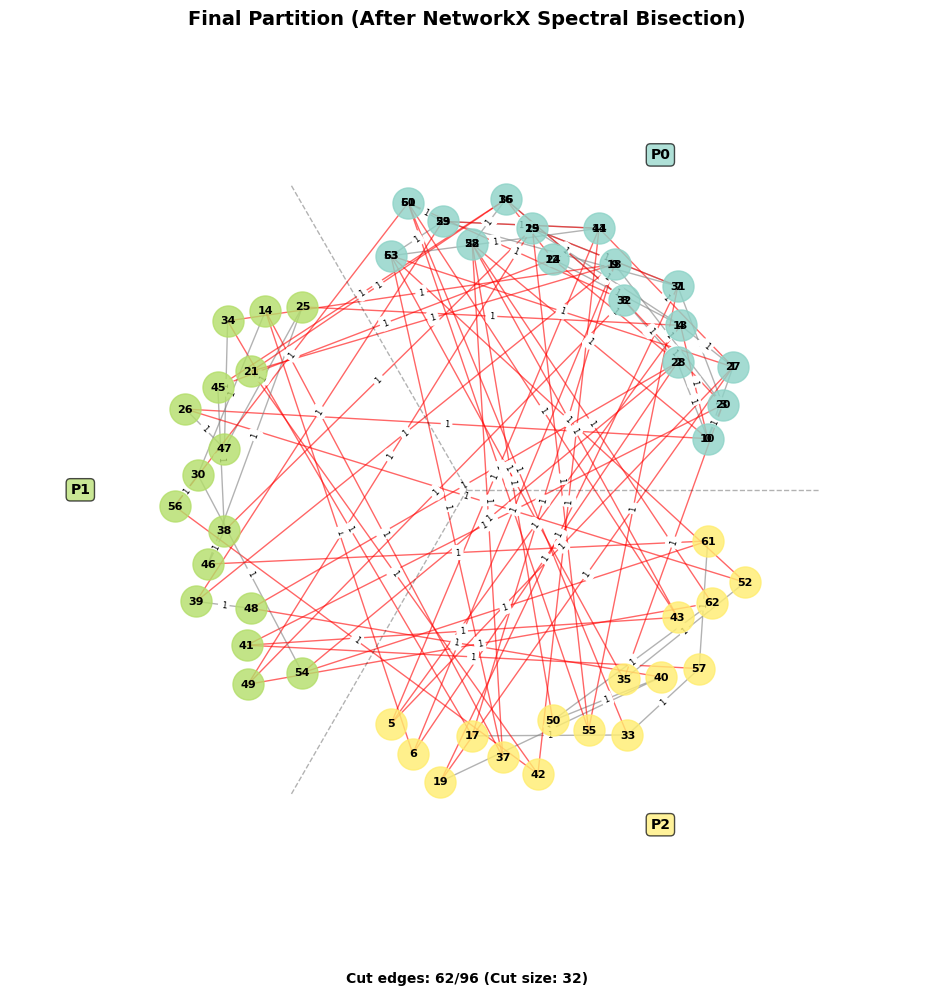

In [ ]:
start = time.time()
G, comms = cut_nx_graph_max(test_graph, qpu_max=max(list(qpu_sizes.values())), func="spectral", seed=42)
end = time.time()
print(f"Graph partitioning completed in {end - start:.2f} seconds.")




assignment_SB = set_assignment_from_communities(test_graph, comms)

partition_counts = [len([n for n in assignment_SB if n == i]) for i in range(max(assignment_SB) + 1)]
print(f"\nPartition sizes from NetworkX spectral bisection: {partition_counts}")

print(len(comms), max(assignment_SB)+1)

draw_partitioned_graph(test_graph, max(assignment_SB), assignment_SB, "Final Partition (After NetworkX Spectral Bisection)")

In [ ]:
cut_SB = calculate_cut_size(test_graph, assignment_SB)
print(f"\nCut size from NetworkX spectral bisection: {cut_SB}")


Cut size from NetworkX spectral bisection: 32
